# COMP47750-Machine Learning with Python
# Assignment 2-Feature Engineering
###### Madhav Mohan-22204214

##### importing libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Task 1

### 1. Load the dataset into a dataframe that can be used for predicting  traffic_volume a day in advance.


In [2]:
df=pd.read_csv("metro_traffic_15_19.csv")

In [3]:
df_copy=df

##### Data Preprocessing

In [4]:
df.shape

(32047, 6)

In [5]:
df.dtypes

date_time          object
rain_1h           float64
snow_1h           float64
temp              float64
clouds_all          int64
traffic_volume      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32047 entries, 0 to 32046
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_time       32047 non-null  object 
 1   rain_1h         32047 non-null  float64
 2   snow_1h         32047 non-null  float64
 3   temp            32047 non-null  float64
 4   clouds_all      32047 non-null  int64  
 5   traffic_volume  32047 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.5+ MB


In [7]:
df.describe(include='object')

,date_time
count,32047
unique,26528
top,2018-04-13 21:00:00
freq,5


In [8]:
print("max date :" +df.date_time.max())
print("min date :" +df.date_time.min())

max date :2018-09-30 23:00:00
min date :2015-07-01 00:00:00


In [9]:
duplicates=df.duplicated() #finding duplicates

In [10]:
count=str(len(df)-len(duplicates))

In [11]:
print("the total number of duplicates is : " + count)

the total number of duplicates is : 0


## 2.Produce some plots at different time-scales to see if there is periodicity in the traffic volume.

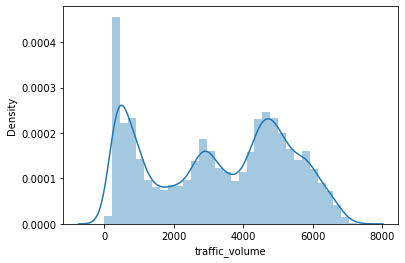

In [12]:
sns.distplot(df.traffic_volume)
plt.show()

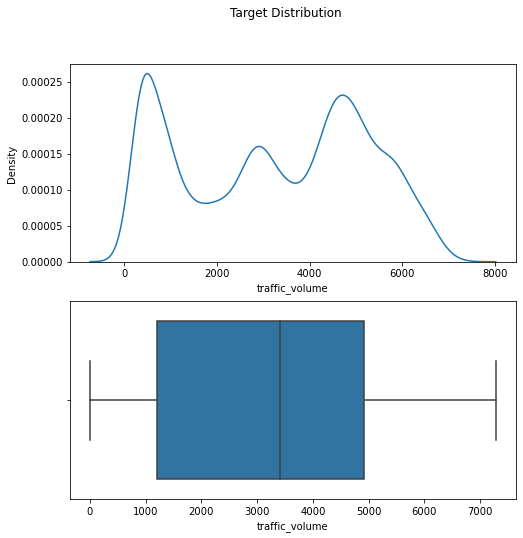

In [13]:
fig, ax = plt.subplots(2,1,figsize=(8,8))
fig.suptitle('Target Distribution')

sns.kdeplot(df['traffic_volume'], ax=ax[0])
sns.boxplot(df['traffic_volume'], ax=ax[1])

plt.show()

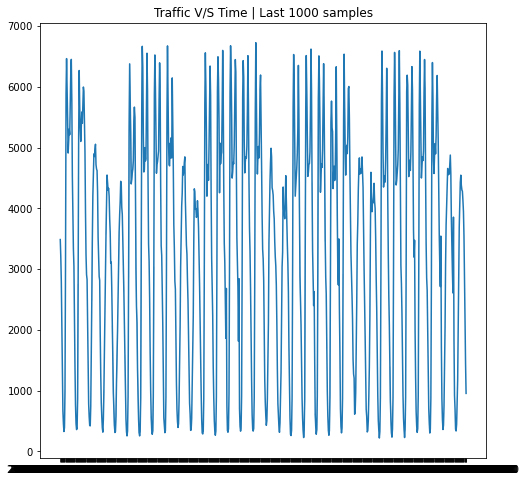

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

last = 1000
sns.lineplot(x=df['date_time'].values[-last:],y=df['traffic_volume'].values[-last:])

plt.title(f'Traffic V/S Time | Last {last} samples')

plt.show()

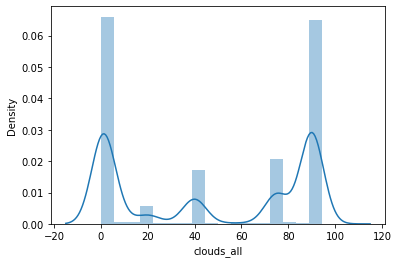

In [15]:
sns.distplot(df.clouds_all)
plt.show()

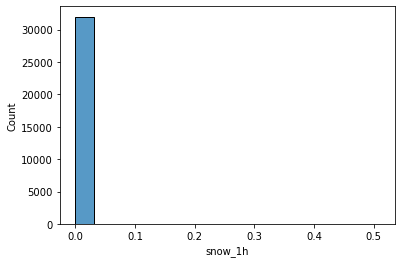

In [16]:
sns.histplot(df.snow_1h)
plt.show()

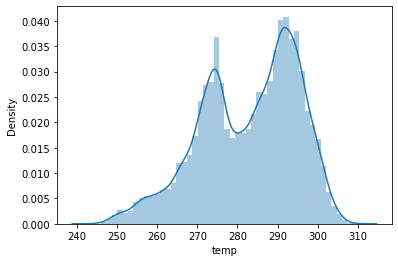

In [17]:
sns.distplot(df.temp)
plt.show()

###### Based on the plots mentioned above, there is periodicity in traffic volume

## Task 2

### 1. Extract hour, day and month features from the time-stamps.

In [18]:
df['date_time'] = pd.to_datetime(df.date_time)
df['weekday'] = df.date_time.dt.weekday
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year
df['day'] = df['date_time'].dt.day_name()

In [19]:
df.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,weekday,hour,month,year,day
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,2,0,7,2015,Wednesday
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,2,1,7,2015,Wednesday
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,2,7,2015,Wednesday
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,2,3,7,2015,Wednesday
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,2,4,7,2015,Wednesday


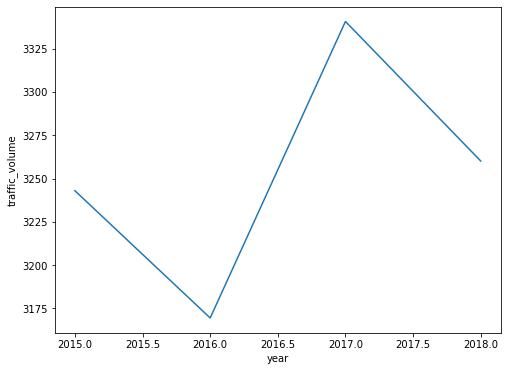

In [20]:
df_date_traffic = df.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic.traffic_volume, data = df_date_traffic)
plt.show()

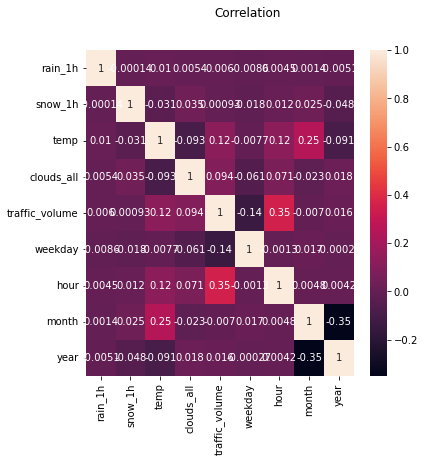

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
fig.suptitle('Correlation')

sns.heatmap(df.corr(),annot=True)

plt.show()

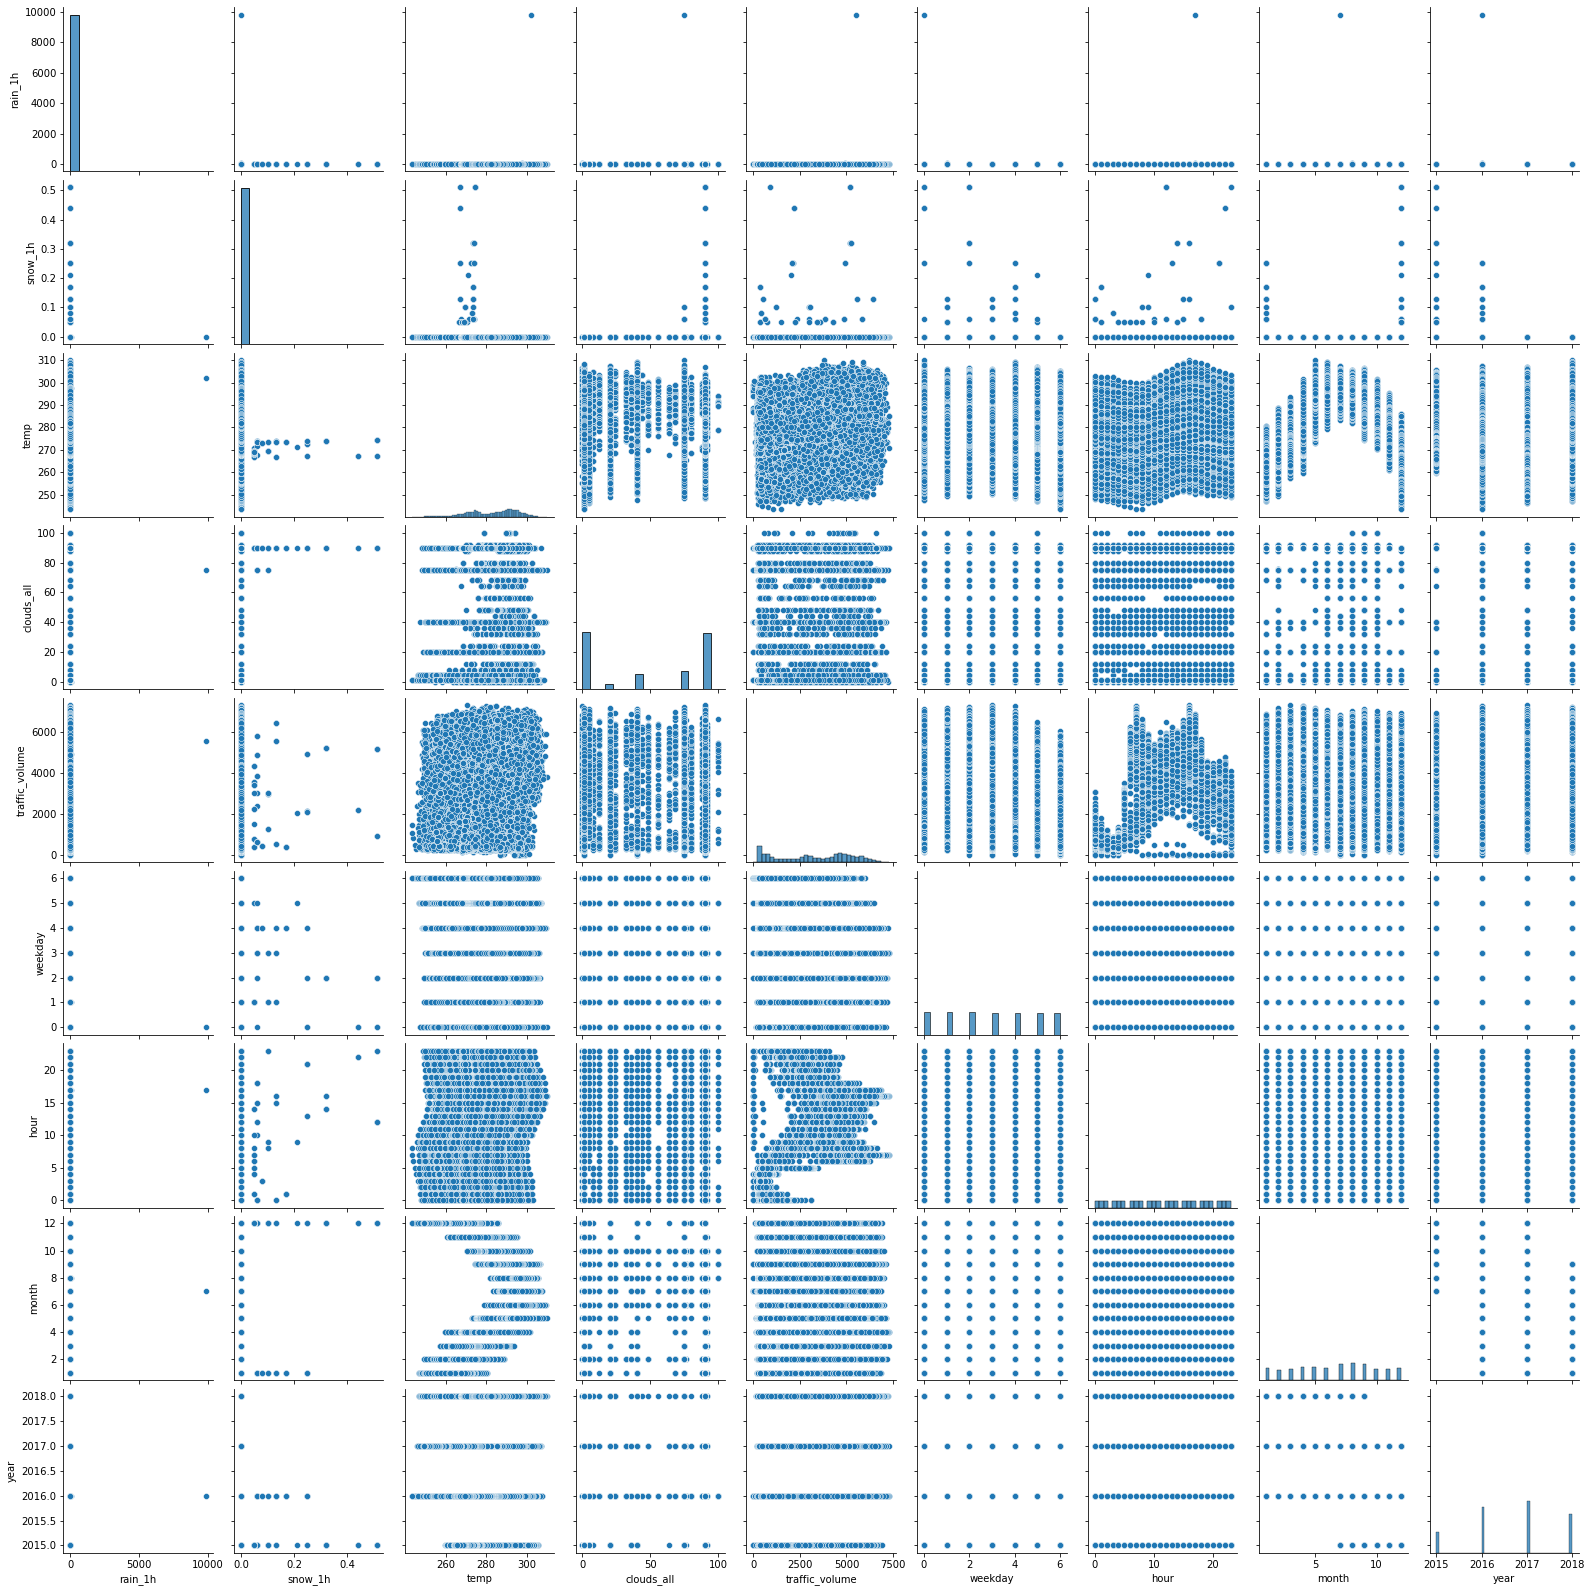

In [22]:
sns.pairplot(df)

plt.show()

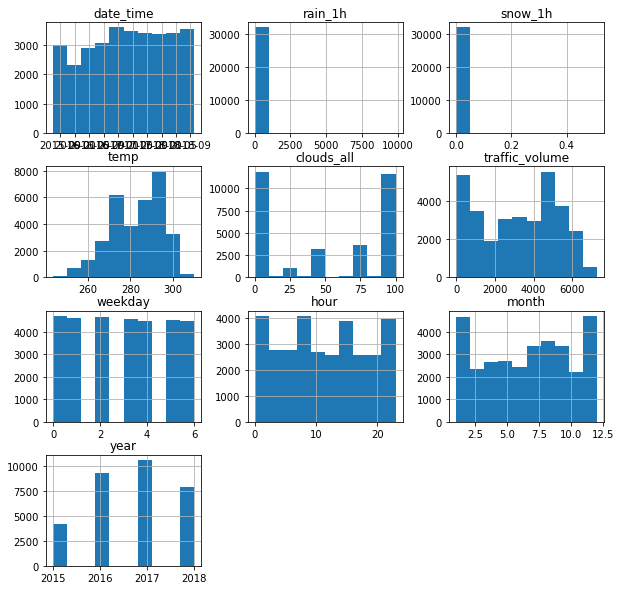

In [23]:
df.hist(figsize=(10,10))
plt.show()

### Detecting and removing outliers

Text(0.5, 1.0, 'traffic_volume')

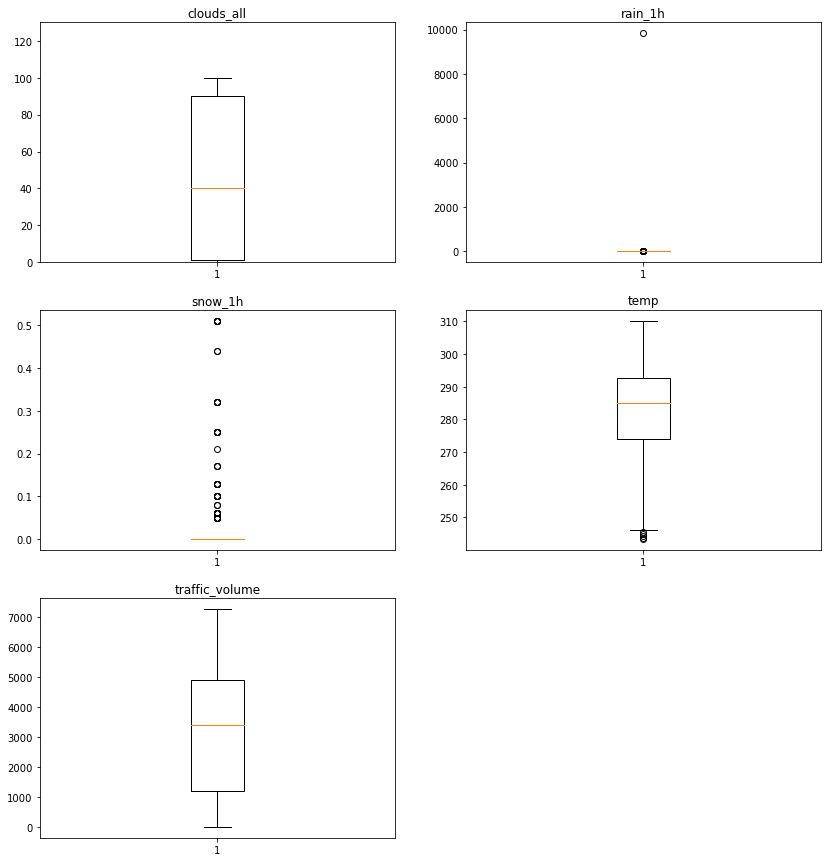

In [24]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(df['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(df['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(df['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(df['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(df['traffic_volume'])
plt.title('traffic_volume')

In [25]:
# Using matplotlib.cbbok.boxplot_stats library to extract all info about column
from matplotlib.cbook import boxplot_stats 

def detect_outliers(column):
    outl = boxplot_stats(column)[0]['fliers']
    return outl

In [26]:
def print_outliers(columns,df):
    for i in columns:
        # Using Detect_outliers to detect outliers in Dataframe
        outl = detect_outliers(df[str(i)])    
        print("outliers in ",i,"are : ",outl)

In [27]:
def remove_outliers(columns,df):
    for i in columns:
        # Using Detect_outliers to detect outliers in Dataframe
        outl = detect_outliers(df[str(i)])    
        # Removing Outliers from DataFrame
        df = df[~df[str(i)].isin(outl)]
        
    return df

In [28]:
# Detecting Numerical columns in dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_colum = df.select_dtypes(include=numerics)

In [29]:
print_outliers(numerical_colum,df)

#Applying Remove outliers Code
df = remove_outliers(numerical_colum,df)
print("\n Columns After Removing \n")

#After Applying Remove Function
print_outliers(numerical_colum,df)

outliers in  rain_1h are :  [0.3  0.3  0.3  ... 0.25 0.25 0.25]
outliers in  snow_1h are :  [0.51 0.51 0.51 0.51 0.32 0.32 0.32 0.32 0.32 0.06 0.06 0.05 0.21 0.06
 0.06 0.25 0.25 0.44 0.44 0.51 0.51 0.13 0.13 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.1  0.1  0.1  0.1  0.05 0.05 0.05 0.25 0.25
 0.06 0.06 0.06 0.06 0.13 0.13 0.1  0.1  0.06 0.06 0.06 0.06 0.17 0.17
 0.17 0.08 0.08 0.25 0.25 0.13 0.13]
outliers in  temp are :  [245.62 244.89 244.22 243.62 243.39]
outliers in  clouds_all are :  []
outliers in  traffic_volume are :  []
outliers in  weekday are :  []
outliers in  hour are :  []
outliers in  month are :  []
outliers in  year are :  []

 Columns After Removing 

outliers in  rain_1h are :  []
outliers in  snow_1h are :  []
outliers in  temp are :  []
outliers in  clouds_all are :  []
outliers in  traffic_volume are :  []
outliers in  weekday are :  []
outliers in  hour are :  []
outliers in  month are :  []
outliers in  year are :  []


Text(0.5, 1.0, 'traffic_volume')

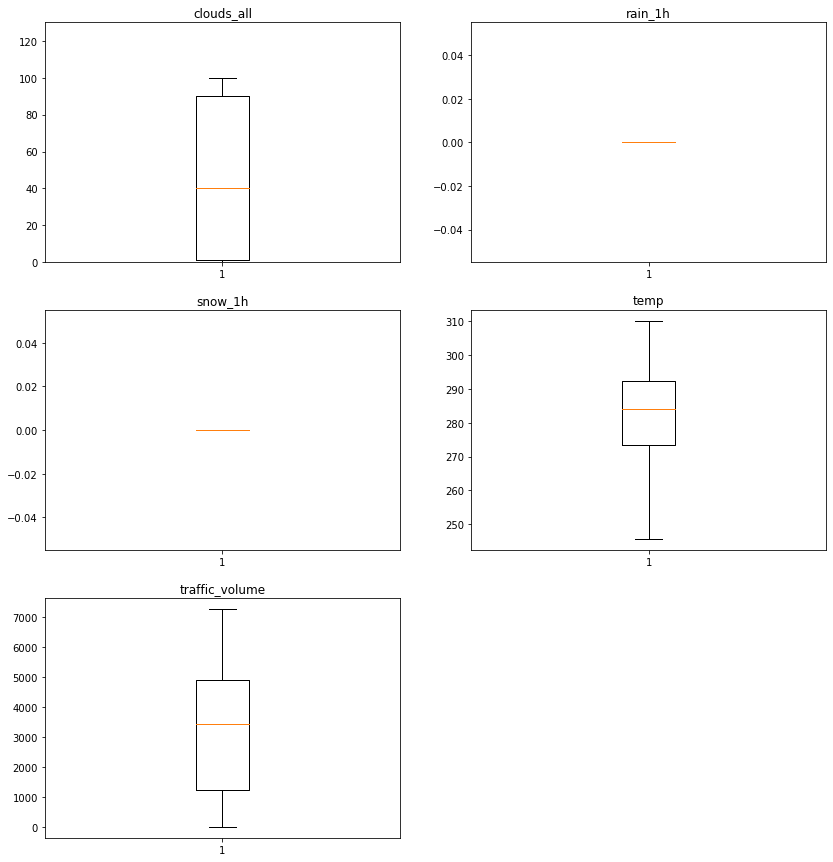

In [30]:
plt.figure(figsize=(14,15))
plt.subplot(3,2,1)
plt.boxplot(df['clouds_all'])
plt.ylim(0,130)
plt.title('clouds_all')

plt.subplot(3,2,2)
plt.boxplot(df['rain_1h'])
plt.title('rain_1h')

plt.subplot(3,2,3)
plt.boxplot(df['snow_1h'])
plt.title('snow_1h')

plt.subplot(3,2,4)
plt.boxplot(df['temp'])
plt.title('temp')

plt.subplot(3,2,5)
plt.boxplot(df['traffic_volume'])
plt.title('traffic_volume')

In [31]:
df.drop(['date_time'], axis = 1, inplace = True)

#### Encoding the columns

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encoder = LabelEncoder()

In [34]:
df['day'] = encoder.fit_transform(df['day'])

In [35]:
df['temp'] = df['temp'] - 242 #changing temperature to Kelvin for better results

In [36]:
df

,rain_1h,snow_1h,temp,clouds_all,traffic_volume,weekday,hour,month,year,day
0,0.0,0.0,47.20,1,737,2,0,7,2015,6
1,0.0,0.0,47.40,1,444,2,1,7,2015,6
2,0.0,0.0,47.19,1,347,2,2,7,2015,6
4,0.0,0.0,46.07,1,936,2,4,7,2015,6
5,0.0,0.0,45.87,1,2886,2,5,7,2015,6
...,...,...,...,...,...,...,...,...,...,...
32042,0.0,0.0,41.45,75,3543,6,19,9,2018,3
32043,0.0,0.0,40.76,90,2781,6,20,9,2018,3
32044,0.0,0.0,40.73,90,2159,6,21,9,2018,3
32045,0.0,0.0,40.09,90,1450,6,22,9,2018,3


## 2. Divide the data into train and test sets keeping one third of the data for testing.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [38]:
(X, Y) = (df.drop(['traffic_volume'], axis = 1).values, df['traffic_volume'].values)


#### scaling and transofrming data

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, Y, random_state = 200, test_size = 0.33)

### 3. Build two different regression models and test the accuracy. Try Linear Regression and one other regression model from scikit learn

## Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [42]:
LR.fit(Xtrain,y_train)

LinearRegression()

In [43]:
pred = LR.predict(Xtest)

In [44]:
import sklearn.metrics as metrics

In [45]:
print('R Squared : ',metrics.r2_score(y_test,pred))

R Squared :  0.16043243761684023


In [46]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error :  1576.2352045223522


In [47]:
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,pred))

Mean Squared Error :  3231042.155044765


In [48]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_test,pred)))

Root Mean Squared Error :  1797.5099874673201


#### By fitting all the features in the model we got 16% R squared.From the score we can get the inference that only 16 percent of the variation is reduced by including all the features in the model.

In [49]:
for i in range(len(df.columns)-1):
    X=  df[[df.columns[i]]]
    Y=  df[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.33,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(df.columns[i],': ',round(metrics.r2_score(ytest,pred),4))

rain_1h :  -0.0004
snow_1h :  -0.0004
temp :  0.0182
clouds_all :  0.0076
traffic_volume :  1.0
weekday :  0.0237
hour :  0.124
month :  -0.0008
year :  -0.0002


### From the above R squared score only 3 feature temp and Hour, weekday is the only feature which has better score. so we add these two features as the base and proceed with other features.

In [50]:
for i in range(len(df.columns)-1):
    X=  df[['temp','hour','weekday',df.columns[i]]]
    Y=  df[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.33,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(df.columns[i],round(metrics.r2_score(ytest,pred),4))

rain_1h 0.1552
snow_1h 0.1552
temp 0.1552
clouds_all 0.1601
traffic_volume 1.0
weekday 0.1552
hour 0.1552
month 0.1552
year 0.1556


### The next highest score is for clouds_all so we will include it in the next iteration

In [51]:
for i in range(len(df.columns)-1):
    X=  df[['temp','hour','weekday','clouds_all',df.columns[i]]]
    Y=  df[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.33,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(df.columns[i],round(metrics.r2_score(ytest,pred),4))

rain_1h 0.1601
snow_1h 0.1601
temp 0.1601
clouds_all 0.1601
traffic_volume 1.0
weekday 0.1601
hour 0.1601
month 0.16
year 0.1604


### We have attained the R squared score of the base model which includes all the features.So from this we can say that only 4 features are enough for the prediction.These 4 features ['temp','hour','weekday','clouds_all'] have contributed the 100% for 16% variation of dependent variable. To confirm this, we can use Kbest and Chi2 from sklearn

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('traffic_volume',axis=1)
Y = df['traffic_volume']

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  

print(featureScores.nlargest(5,'Score'))

        Specs          Score
3  clouds_all  298434.905807
5        hour   85494.703356
2        temp   32229.530587
6       month   14758.011546
4     weekday   14060.737235


## Polynomial regression

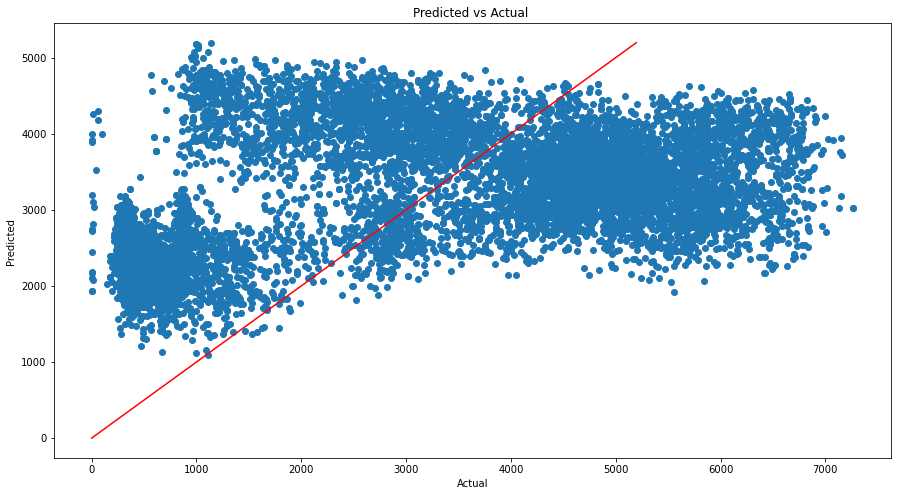

In [53]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Predicted vs Actual ')
plt.xlabel ('Actual') 
plt.ylabel ('Predicted ') 
plt.show ()

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
pf = PolynomialFeatures(degree=2)

In [56]:
df1 = df.copy()

In [57]:
X = df1.drop('traffic_volume',axis=1)
Y= df1['traffic_volume']

### Transforming the data

In [58]:
X = pf.fit_transform(X)

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.33,random_state=0)

In [60]:
LR = LinearRegression()

In [61]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [62]:
pred = LR.predict(xtest)

In [63]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.7042074005971811


In [64]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  833.4552121952764


In [65]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  1163684.6336286927


In [66]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  1078.7421534494204


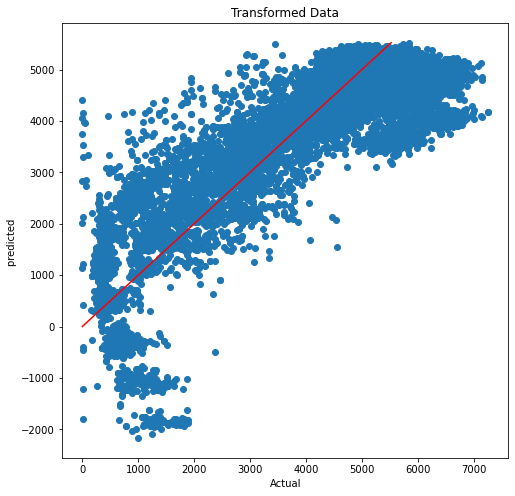

In [67]:
plt.figure(figsize=(8,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Transformed Data')
plt.xlabel ('Actual') 
plt.ylabel ('predicted ') 
plt.show ()

#### the R squared has increased to 70 percent and variation is reduced after transforming the data to polynomial regression

## Random Forest regressor

In [68]:
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
X = df.drop('traffic_volume',axis=1)
Y = df['traffic_volume']

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.33,random_state=0)

In [71]:
RT = RandomForestRegressor()

In [72]:
RT.fit(xtrain,ytrain)

RandomForestRegressor()

In [73]:
pred = RT.predict(xtest)

In [74]:
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.9586546205944066
Mean Absolute Error :  219.1756351746415
Mean Squared Error :  162657.8311390259
Root Mean Squared Error :  403.3086053371858


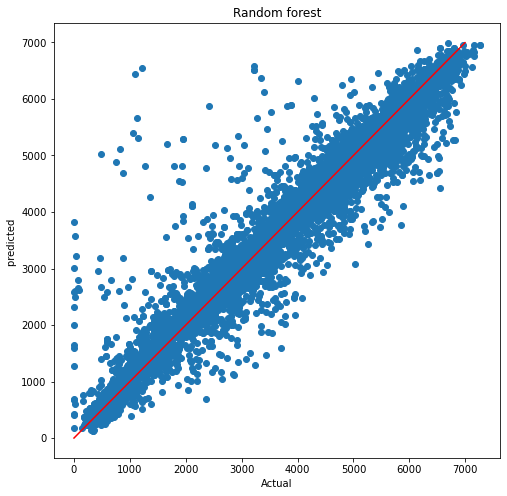

In [75]:
plt.figure(figsize=(8,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Random forest')
plt.xlabel ('Actual') 
plt.ylabel ('predicted ') 
plt.show ()

### Random forest is better regression model than Linear regression and polynomial regression

In [76]:
df_copy.drop("day",axis=1)

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,weekday,hour,month,year
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,2,0,7,2015
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,2,1,7,2015
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,2,7,2015
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,2,3,7,2015
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,2,4,7,2015
...,...,...,...,...,...,...,...,...,...,...
32042,2018-09-30 19:00:00,0.0,0.0,283.45,75,3543,6,19,9,2018
32043,2018-09-30 20:00:00,0.0,0.0,282.76,90,2781,6,20,9,2018
32044,2018-09-30 21:00:00,0.0,0.0,282.73,90,2159,6,21,9,2018
32045,2018-09-30 22:00:00,0.0,0.0,282.09,90,1450,6,22,9,2018


## Task 3
### Given that the linear numeric encoding of the hour, day and month features may miss cyclical signals, investigate and test a cyclical strategy for encoding these features. Does this strategy improve accuracy for the models tested in Task 2?


In [77]:
df_copy["day"]=df_copy['date_time'].dt.day

In [78]:
df_copy['Sin_Hour'] = np.sin(2 * np.pi * df_copy['hour'] / max(df_copy['hour']))
df_copy['Cos_Hour'] = np.cos(2 * np.pi * df_copy['hour'] / max(df_copy['hour']))

In [79]:
df_copy['mnth_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df_copy['mnth_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [80]:
def encode(df_copy, col, max_val):
    df_copy[col + '_sin'] = np.sin(2 * np.pi * df_copy[col]/max_val)
    df_copy[col + '_cos'] = np.cos(2 * np.pi * df_copy[col]/max_val)
    return df_copy

In [81]:
data = encode(df_copy, 'day', 31)

In [82]:
data

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,weekday,hour,month,year,day,Sin_Hour,Cos_Hour,mnth_sin,mnth_cos,day_sin,day_cos
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,2,0,7,2015,1,0.000000e+00,1.000000,1.224647e-16,-1.0,0.201299,0.97953
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,2,1,7,2015,1,2.697968e-01,0.962917,1.224647e-16,-1.0,0.201299,0.97953
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,2,7,2015,1,5.195840e-01,0.854419,1.224647e-16,-1.0,0.201299,0.97953
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,2,3,7,2015,1,7.308360e-01,0.682553,NaN,NaN,0.201299,0.97953
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,2,4,7,2015,1,8.878852e-01,0.460065,1.224647e-16,-1.0,0.201299,0.97953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32042,2018-09-30 19:00:00,0.0,0.0,283.45,75,3543,6,19,9,2018,30,-8.878852e-01,0.460065,-8.660254e-01,-0.5,-0.201299,0.97953
32043,2018-09-30 20:00:00,0.0,0.0,282.76,90,2781,6,20,9,2018,30,-7.308360e-01,0.682553,-8.660254e-01,-0.5,-0.201299,0.97953
32044,2018-09-30 21:00:00,0.0,0.0,282.73,90,2159,6,21,9,2018,30,-5.195840e-01,0.854419,-8.660254e-01,-0.5,-0.201299,0.97953
32045,2018-09-30 22:00:00,0.0,0.0,282.09,90,1450,6,22,9,2018,30,-2.697968e-01,0.962917,-8.660254e-01,-0.5,-0.201299,0.97953


In [83]:
data=data.drop("hour",axis=1)
data=data.drop("day",axis=1)
data=data.drop("month",axis=1)
data=data.drop("weekday",axis=1)
data=data.drop("date_time",axis=1)

#### the cylcic encoded dataframe has some null values which needs to be removed

In [84]:
data[data.isna().any(axis=1)]

,rain_1h,snow_1h,temp,clouds_all,traffic_volume,year,Sin_Hour,Cos_Hour,mnth_sin,mnth_cos,day_sin,day_cos
3,0.30,0.0,288.74,1,356,2015,0.730836,0.682553,NaN,NaN,0.201299,0.979530
114,0.30,0.0,292.60,1,338,2015,0.730836,0.682553,NaN,NaN,0.848644,0.528964
115,0.30,0.0,292.60,1,338,2015,0.730836,0.682553,NaN,NaN,0.848644,0.528964
137,1.50,0.0,296.20,90,398,2015,0.269797,0.962917,NaN,NaN,0.937752,0.347305
138,1.50,0.0,296.20,90,398,2015,0.269797,0.962917,NaN,NaN,0.937752,0.347305
...,...,...,...,...,...,...,...,...,...,...,...,...
31931,0.25,0.0,279.43,75,6032,2018,0.816970,-0.576680,NaN,NaN,-0.848644,0.528964
31952,0.25,0.0,286.49,75,3002,2018,0.979084,0.203456,NaN,NaN,-0.724793,0.688967
31959,0.25,0.0,286.88,90,4670,2018,0.136167,-0.990686,NaN,NaN,-0.724793,0.688967
31996,0.25,0.0,276.18,1,1733,2018,0.000000,1.000000,NaN,NaN,-0.394356,0.918958


In [85]:
data=data.dropna()

In [86]:
data

,rain_1h,snow_1h,temp,clouds_all,traffic_volume,year,Sin_Hour,Cos_Hour,mnth_sin,mnth_cos,day_sin,day_cos
0,0.0,0.0,289.20,1,737,2015,0.000000e+00,1.000000,1.224647e-16,-1.0,0.201299,0.97953
1,0.0,0.0,289.40,1,444,2015,2.697968e-01,0.962917,1.224647e-16,-1.0,0.201299,0.97953
2,0.0,0.0,289.19,1,347,2015,5.195840e-01,0.854419,1.224647e-16,-1.0,0.201299,0.97953
4,0.0,0.0,288.07,1,936,2015,8.878852e-01,0.460065,1.224647e-16,-1.0,0.201299,0.97953
5,0.0,0.0,287.87,1,2886,2015,9.790841e-01,0.203456,1.224647e-16,-1.0,0.201299,0.97953
...,...,...,...,...,...,...,...,...,...,...,...,...
32042,0.0,0.0,283.45,75,3543,2018,-8.878852e-01,0.460065,-8.660254e-01,-0.5,-0.201299,0.97953
32043,0.0,0.0,282.76,90,2781,2018,-7.308360e-01,0.682553,-8.660254e-01,-0.5,-0.201299,0.97953
32044,0.0,0.0,282.73,90,2159,2018,-5.195840e-01,0.854419,-8.660254e-01,-0.5,-0.201299,0.97953
32045,0.0,0.0,282.09,90,1450,2018,-2.697968e-01,0.962917,-8.660254e-01,-0.5,-0.201299,0.97953


In [87]:
X = data.drop('traffic_volume',axis=1)
Y = data['traffic_volume']

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.33,random_state=0)

In [89]:
LR = LinearRegression()

In [90]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [91]:
pred = LR.predict(xtest)

In [92]:
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.6290212986477152
Mean Absolute Error :  934.4598721795769
Mean Squared Error :  1459476.0485514286
Root Mean Squared Error :  1208.087765251941


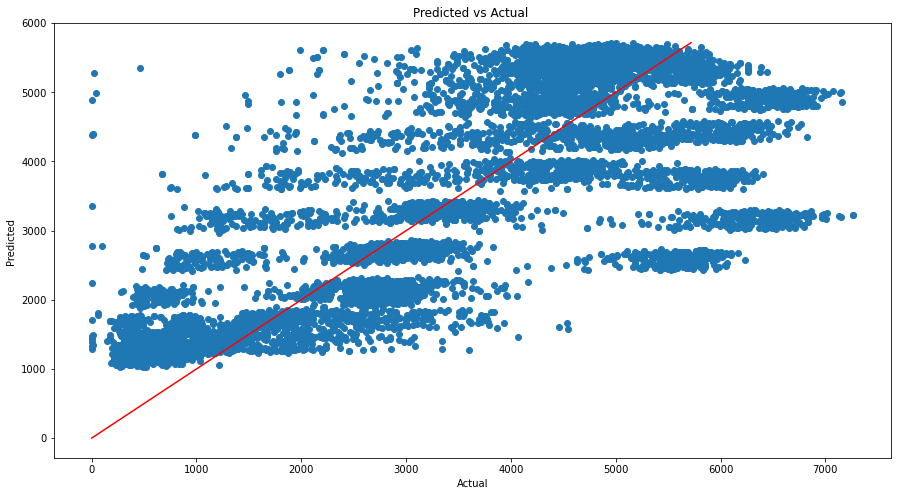

In [93]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Predicted vs Actual ')
plt.xlabel ('Actual') 
plt.ylabel ('Predicted ') 
plt.show ()

### We can see that the Linear Regression model predicted better when the features are cyclically encoded and the R squared score is 62% when features are cyclically encoded compared to 16% when they are not encoded

## Task 4
### Identify effective subsets of the features for this prediction task. These can be the same subset for all models or model-specific subsets. 


In [94]:
from sklearn.feature_selection import SequentialFeatureSelector

In [95]:
feature= SequentialFeatureSelector(LR,n_features_to_select =3)
feature.fit(xtrain,ytrain)
selected_feature=feature.get_support()
selected_feature

array([False, False, False, False, False,  True,  True, False,  True,
       False, False])

In [96]:
index=0
columns=[]
for f in selected_feature:
    if(f):
        columns.append(xtrain.columns[index])
    index=index+1
columns

['Sin_Hour', 'Cos_Hour', 'mnth_cos']

## Conclusion

### As we can see, the Hour feature is the most effective feature when predicting the traffic volume after applying cyclic encoding. I have used the chi2 feature selection on task 2 for comparison in which the top 5 features that were effective were identified. so, it is better to select the features first and apply cyclic encoding since sine and cosine transformation are applied which splits a single information to two features. We can come to a conclusion that the top features that are most important in traffic prediction are Hour,Month,Temp, Weekday and Cloud_all  for all the models